In [3]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('spotify-2023.csv',encoding='latin-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,89,30,13,194,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,210,48,11,953,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33


# BASIC DESCRIPTIVE STATISTICS


In [38]:
import pandas as pd
import numpy.ma as ma

# Assuming df is already defined in your environment
# Statistics for Streams
streams = pd.to_numeric(df['streams'], errors='coerce')  # Convert to numeric, replacing errors with NaN
streams_stats_df = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation"],
    "Streams": [streams.mean(), streams.median(), streams.std()]
})

# Display streams statistics as DataFrame
print("Statistics for Streams:")
display(streams_stats_df)
print("\n")

# Distribution of released_year
year_dist_df = df['released_year'].value_counts().sort_index().reset_index()
year_dist_df.columns = ["Released Year", "Count"]

# Summary Statistics for Released Year
released_year_summary_df = df['released_year'].describe().to_frame(name="Released Year Stats").reset_index()
released_year_summary_df.columns = ["Statistic", "Value"]

# Display year distribution and summary statistics as DataFrames
print("Distribution of Released Year:")
display(year_dist_df)
print("\nSummary Statistics for Released Year:")
display(released_year_summary_df)
print("\n")

# Distribution of artist_count
artist_count_dist_df = df['artist_count'].value_counts().sort_index().reset_index()
artist_count_dist_df.columns = ["Artist Count", "Count"]

# Summary Statistics for Artist Count
artist_count_summary_df = df['artist_count'].describe().to_frame(name="Artist Count Stats").reset_index()
artist_count_summary_df.columns = ["Statistic", "Value"]

# Display artist count distribution and summary statistics as DataFrames
print("Distribution of Artist Count:")
display(artist_count_dist_df)
print("\nSummary Statistics for Artist Count:")
display(artist_count_summary_df)


Statistics for Streams:


,Statistic,Streams
0,Mean,5.141374e+08
1,Median,2.905309e+08
2,Standard Deviation,5.668569e+08




Distribution of Released Year:


,Released Year,Count
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1
5,1957,2
6,1958,3
7,1959,2
8,1963,3
9,1968,1



Summary Statistics for Released Year:


,Statistic,Value
0,count,953.000000
1,mean,2018.238195
2,std,11.116218
3,min,1930.000000
4,25%,2020.000000
5,50%,2022.000000
6,75%,2022.000000
7,max,2023.000000




Distribution of Artist Count:


,Artist Count,Count
0,1,587
1,2,254
2,3,85
3,4,15
4,5,5
5,6,3
6,7,2
7,8,2



Summary Statistics for Artist Count:


,Statistic,Value
0,count,953.000000
1,mean,1.556139
2,std,0.893044
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,2.000000
7,max,8.000000


# TOP PERFORMER

In [49]:
# Sort the dataframe by streams in descending order and select the top 5 rows
top_5_streams = df.sort_values('streams', ascending=False).head(5)

# Select and display the desired columns in a formatted DataFrame
top_5_streams_df = top_5_streams[['track_name', 'artist(s)_name', 'streams']].reset_index(drop=True)

# Display the DataFrame
print("Top 5 Tracks by Streams:")
display(top_5_streams_df)


Top 5 Tracks by Streams:


,track_name,artist(s)_name,streams
0,Blinding Lights,The Weeknd,3.703895e+09
1,Shape of You,Ed Sheeran,3.562544e+09
2,Someone You Loved,Lewis Capaldi,2.887242e+09
3,Dance Monkey,Tones and I,2.864792e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


In [8]:
top_5_artists = df['artist(s)_name'].value_counts().head(5)

# Display the results
print("\nTop 5 Artists by Number of Tracks:")
print(top_5_artists)


Top 5 Artists by Number of Tracks:
artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


# TEMPORAL TRENDS


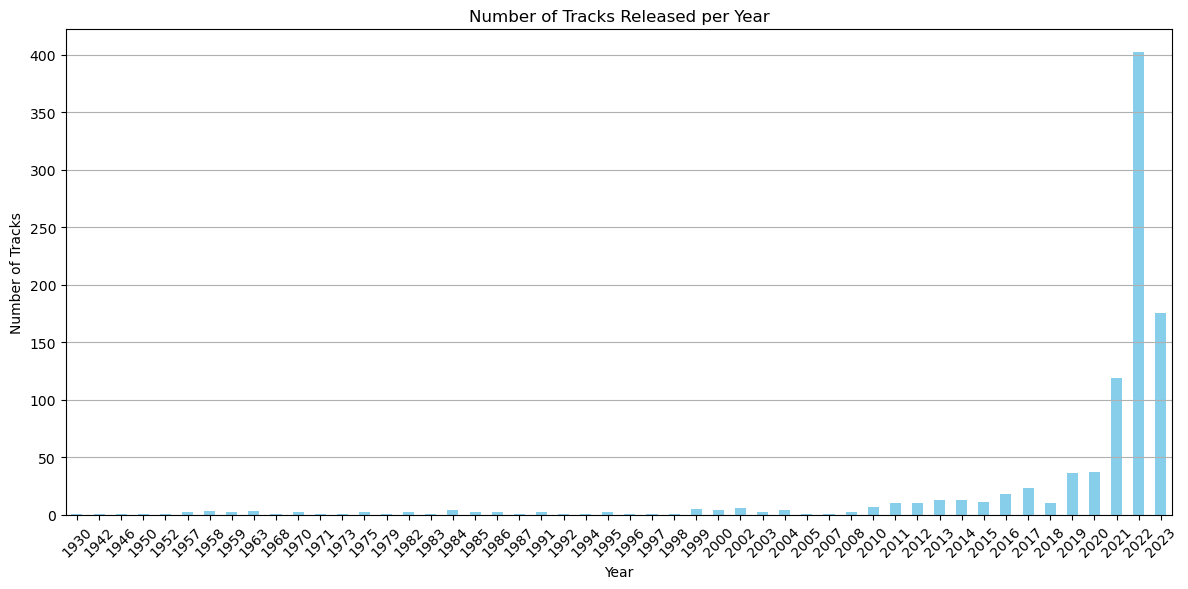

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'released_year' is the only available date information
# Create a synthetic month column based on the data you have
# If you have a month column, use that; otherwise, we can only analyze by year

# For demonstration, let's assume you want to analyze tracks released in each year.
tracks_per_year = df['released_year'].value_counts().sort_index()

# Plotting the number of tracks released per year
plt.figure(figsize=(12, 6))
tracks_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# If you want to analyze by month, we need a month column. If you don't have it, we can only analyze by year.
# If you have a month column, you can use the following to analyze it:
# tracks_per_month = df['release_month'].value_counts().sort_index()

# If you want to see the month with the most releases, you can do:
# most_releases_month = tracks_per_month.idxmax()
# print(f"The month with the most releases is: {most_releases_month} ({tracks_per_month.max()} tracks)")

#  Genre and Music Characteristics



Correlation Matrix:
                 streams       bpm  danceability_%  energy_%  valence_%  \
streams         1.000000 -0.002438       -0.105457 -0.026051  -0.040831   
bpm            -0.002438  1.000000       -0.147095  0.025794   0.041195   
danceability_% -0.105457 -0.147095        1.000000  0.198095   0.408451   
energy_%       -0.026051  0.025794        0.198095  1.000000   0.357612   
valence_%      -0.040831  0.041195        0.408451  0.357612   1.000000   
acousticness_% -0.004485 -0.017694       -0.236165 -0.577344  -0.081907   

                acousticness_%  
streams              -0.004485  
bpm                  -0.017694  
danceability_%       -0.236165  
energy_%             -0.577344  
valence_%            -0.081907  
acousticness_%        1.000000  


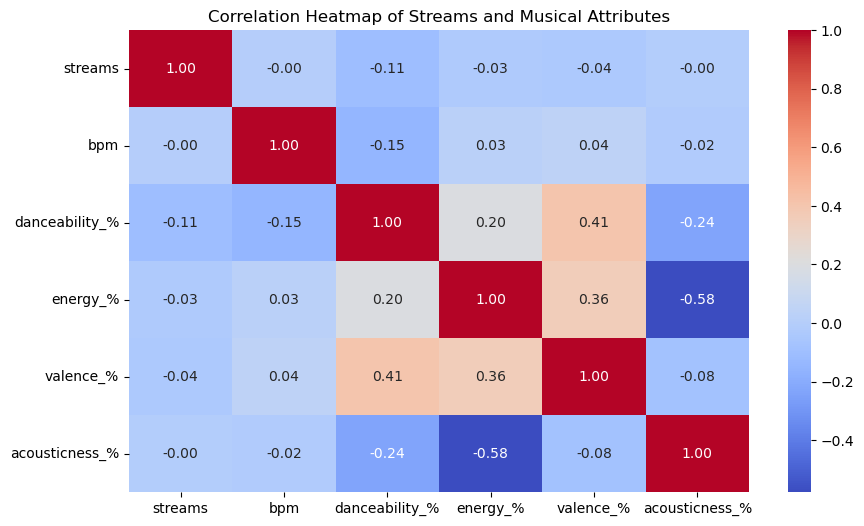

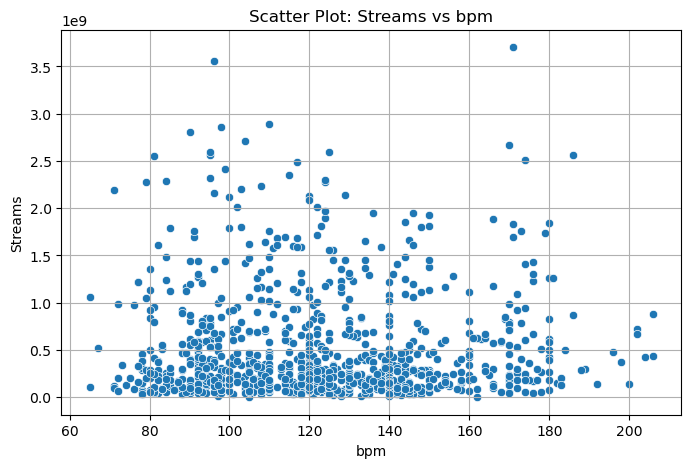

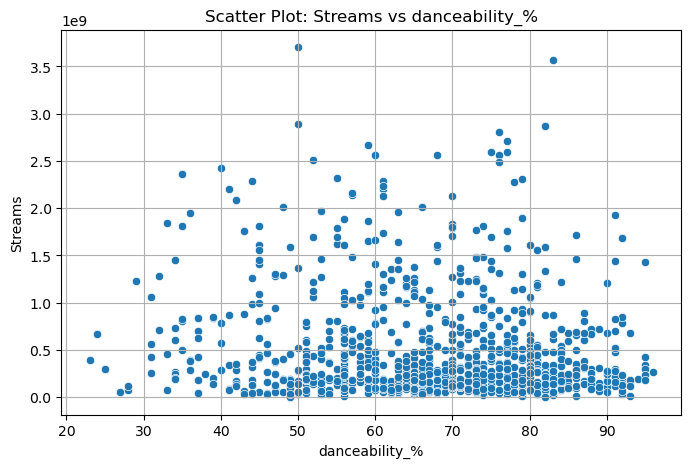

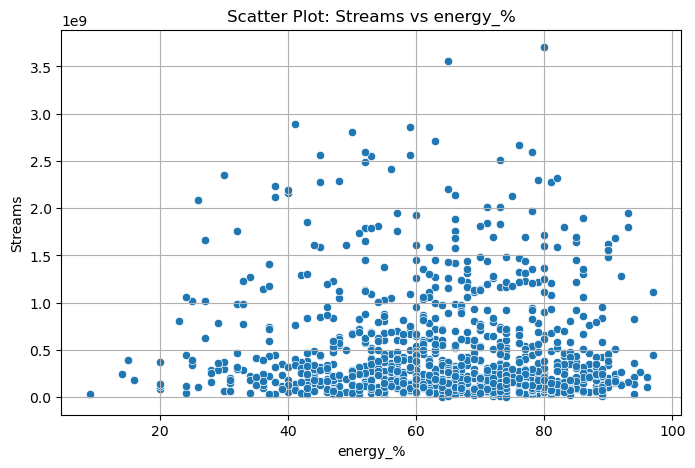

Correlation between Danceability and Energy: 0.20
Correlation between Valence and Acousticness: -0.08


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it contains the relevant columns

# Convert relevant columns to numeric, coercing errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors='coerce')
df['valence_%'] = pd.to_numeric(df['valence_%'], errors='coerce')
df['acousticness_%'] = pd.to_numeric(df['acousticness_%'], errors='coerce')

# Calculate correlation matrix
correlation_matrix = df[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Streams and Musical Attributes')
plt.show()

# Scatter plots for streams vs musical attributes
attributes = ['bpm', 'danceability_%', 'energy_%']
for attr in attributes:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=attr, y='streams')
    plt.title(f'Scatter Plot: Streams vs {attr}')
    plt.xlabel(attr)
    plt.ylabel('Streams')
    plt.grid()
    plt.show()

# Correlation between danceability_% and energy_%
danceability_energy_corr = df['danceability_%'].corr(df['energy_%'])
print(f"Correlation between Danceability and Energy: {danceability_energy_corr:.2f}")

# Correlation between valence_% and acousticness_%
valence_acousticness_corr = df['valence_%'].corr(df['acousticness_%'])
print(f"Correlation between Valence and Acousticness: {valence_acousticness_corr:.2f}")

# PLATFORM POPULATIRY

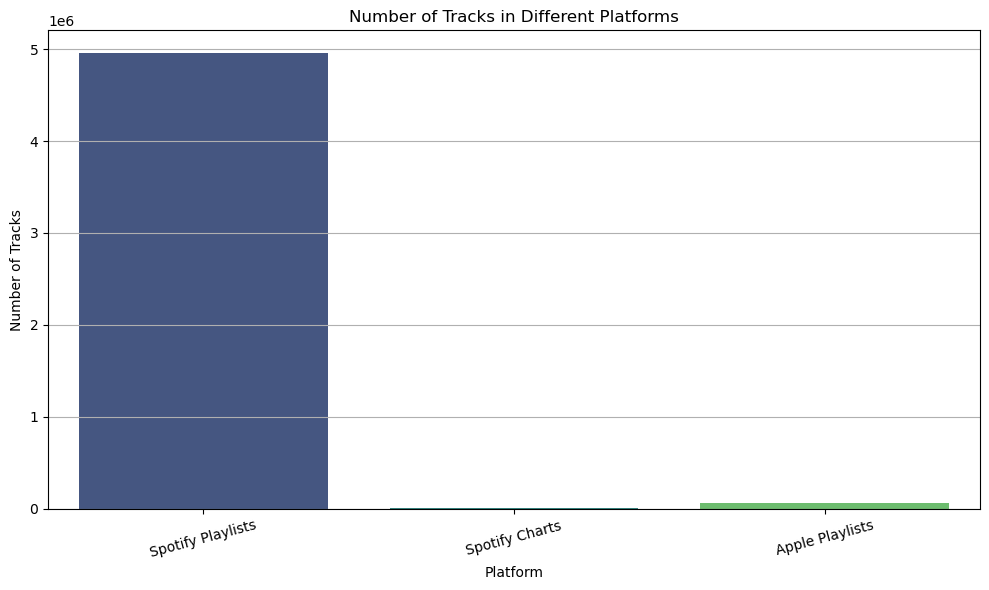

Correlation with Streams:
                       streams  in_spotify_playlists  in_spotify_charts  \
streams               1.000000              0.789822           0.245821   
in_spotify_playlists  0.789822              1.000000           0.164331   
in_spotify_charts     0.245821              0.164331           1.000000   
in_apple_playlists    0.772063              0.708277           0.233354   

                      in_apple_playlists  
streams                         0.772063  
in_spotify_playlists            0.708277  
in_spotify_charts               0.233354  
in_apple_playlists              1.000000  
The platform that seems to favor the most popular tracks is: streams with a correlation of 1.00


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and contains the relevant columns

# Convert relevant columns to numeric, coercing errors to NaN
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')

# Calculate the total number of tracks for each platform
platform_counts = {
    'Spotify Playlists': df['in_spotify_playlists'].sum(),  # Sum to get total tracks
    'Spotify Charts': df['in_spotify_charts'].sum(),        # Sum to get total tracks
    'Apple Playlists': df['in_apple_playlists'].sum()       # Sum to get total tracks
}

# Create a DataFrame for plotting
platform_df = pd.DataFrame(list(platform_counts.items()), columns=['Platform', 'Number of Tracks'])

# Plotting the number of tracks in each platform
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_df, x='Platform', y='Number of Tracks', palette='viridis', hue='Platform')  # Added hue
plt.title('Number of Tracks in Different Platforms')
plt.ylabel('Number of Tracks')
plt.xlabel('Platform')
plt.xticks(rotation=15)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Analyze correlation of streams with playlist/chart presence
correlation_with_streams = df[['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].corr()

# Display correlation results
print("Correlation with Streams:")
print(correlation_with_streams)

# Determine which platform favors the most popular tracks
most_popular_platform = correlation_with_streams['streams'].idxmax()
most_popular_value = correlation_with_streams['streams'].max()

print(f"The platform that seems to favor the most popular tracks is: {most_popular_platform} with a correlation of {most_popular_value:.2f}")

# ADVANCE ANALYSIS

Successfully loaded with latin1 encoding

=== Analysis of Streams by Key and Mode ===


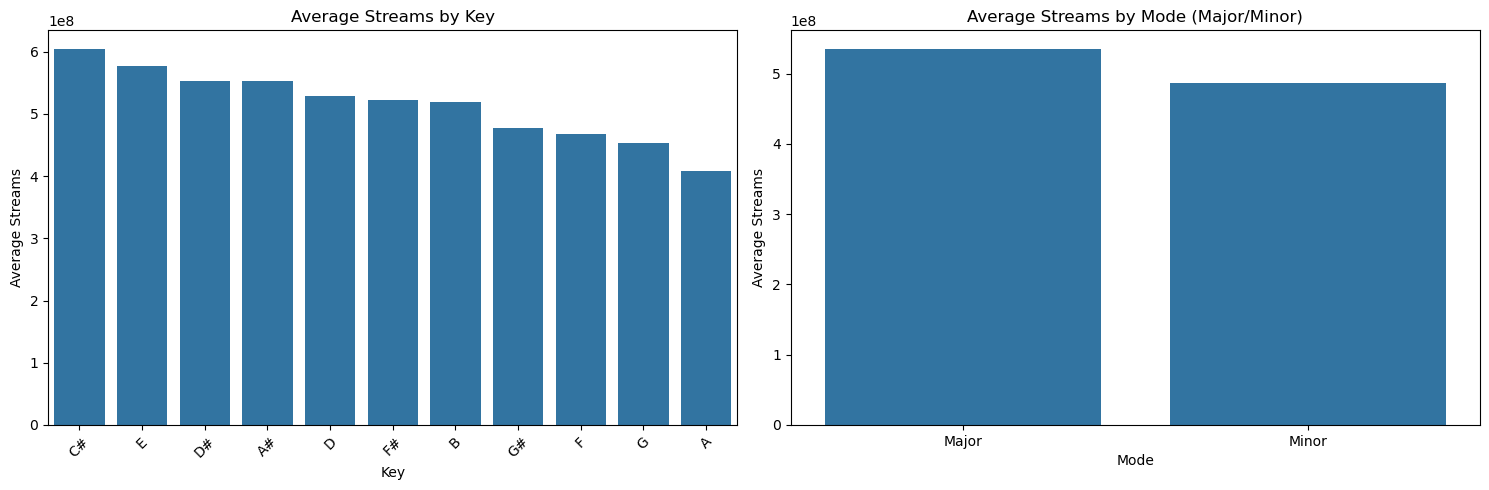


Key with highest average streams: C#
Mode comparison:
mode
Major    5.348328e+08
Minor    4.859445e+08
Name: streams, dtype: float64

=== Analysis of Artist Presence in Playlists and Charts ===


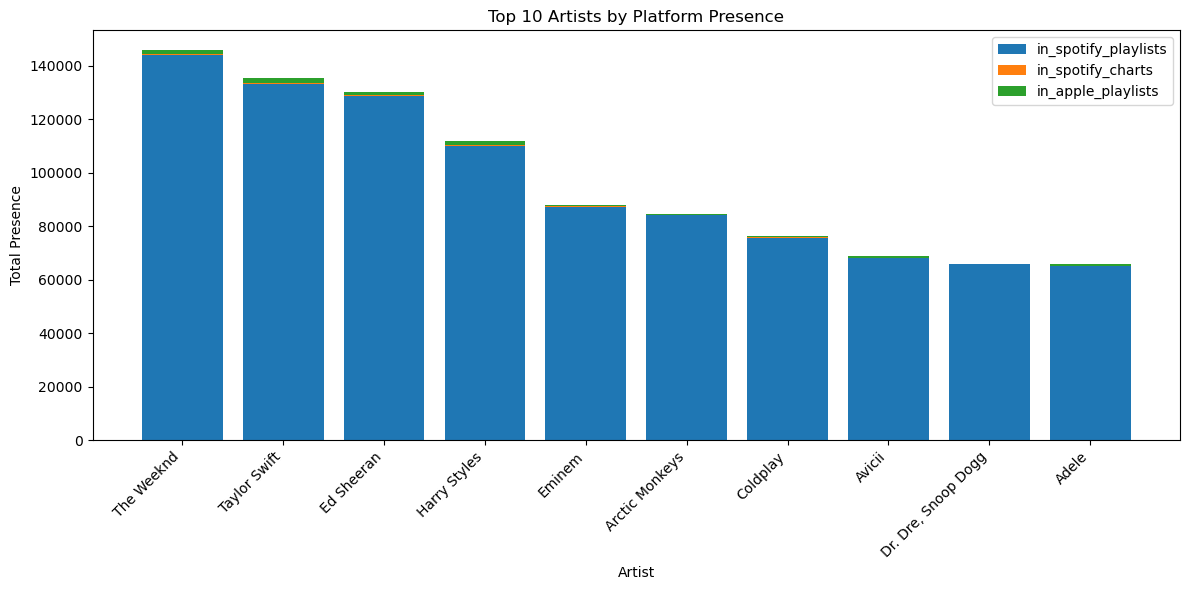


Top 5 Artists by Platform Presence:
    artist(s)_name  total_presence       streams
572     The Weeknd          145910  1.418555e+10
558   Taylor Swift          135312  1.405366e+10
159     Ed Sheeran          130300  1.390895e+10
223   Harry Styles          111952  1.160865e+10
171         Eminem           87958  6.183806e+09

=== Correlation Analysis ===


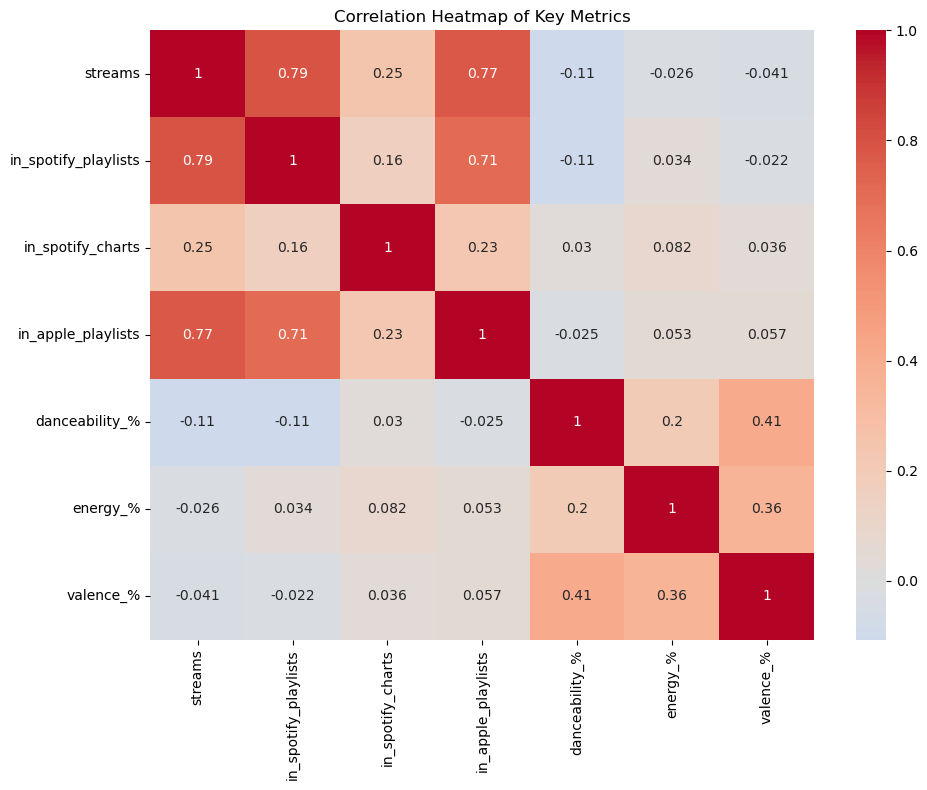

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Analysis of Streams by Key and Mode
def analyze_key_mode_patterns(df):
    print("\n=== Analysis of Streams by Key and Mode ===")
    
    # Calculate average streams by key
    key_streams = df.groupby('key')['streams'].mean().sort_values(ascending=False)
    
    # Calculate average streams by mode
    mode_streams = df.groupby('mode')['streams'].mean()
    
    # Plotting
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Streams by Key
    plt.subplot(1, 2, 1)
    sns.barplot(x=key_streams.index, y=key_streams.values)
    plt.title('Average Streams by Key')
    plt.xlabel('Key')
    plt.ylabel('Average Streams')
    plt.xticks(rotation=45)
    
    # Plot 2: Streams by Mode
    plt.subplot(1, 2, 2)
    sns.barplot(x=mode_streams.index, y=mode_streams.values)
    plt.title('Average Streams by Mode (Major/Minor)')
    plt.xlabel('Mode')
    plt.ylabel('Average Streams')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    print("\nKey with highest average streams:", key_streams.index[0])
    print("Mode comparison:")
    print(mode_streams)

# 2. Analysis of Artists in Playlists and Charts
def analyze_artist_presence(df):
    print("\n=== Analysis of Artist Presence in Playlists and Charts ===")
    
    # Create a DataFrame with artist and their playlist/chart presence
    artist_metrics = df.groupby('artist(s)_name').agg({
        'in_spotify_playlists': 'sum',
        'in_spotify_charts': 'sum',
        'in_apple_playlists': 'sum',
        'streams': 'sum'
    }).reset_index()
    
    # Sort by total presence across all platforms
    artist_metrics['total_presence'] = (artist_metrics['in_spotify_playlists'] + 
                                      artist_metrics['in_spotify_charts'] + 
                                      artist_metrics['in_apple_playlists'])
    
    # Get top 10 artists by presence
    top_artists = artist_metrics.nlargest(10, 'total_presence')
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Create a stacked bar chart
    bottom = np.zeros(len(top_artists))
    
    for column in ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']:
        plt.bar(top_artists['artist(s)_name'], top_artists[column], bottom=bottom, label=column)
        bottom += top_artists[column]
    
    plt.title('Top 10 Artists by Platform Presence')
    plt.xlabel('Artist')
    plt.ylabel('Total Presence')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nTop 5 Artists by Platform Presence:")
    print(top_artists[['artist(s)_name', 'total_presence', 'streams']].head().to_string())

# 3. Correlation Analysis
def analyze_correlations(df):
    print("\n=== Correlation Analysis ===")
    
    # Calculate correlations between key metrics
    correlation_metrics = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 
                         'in_apple_playlists', 'danceability_%', 'energy_%', 'valence_%']
    
    correlations = df[correlation_metrics].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Key Metrics')
    plt.tight_layout()
    plt.show()

# Main execution
def main():
    # Load your DataFrame here with a different encoding
    try:
        # Try different encodings
        encodings = ['latin1', 'iso-8859-1', 'cp1252']
        df = None
        
        for encoding in encodings:
            try:
                df = pd.read_csv('spotify-2023.csv', encoding=encoding)
                print(f"Successfully loaded with {encoding} encoding")
                break
            except UnicodeDecodeError:
                continue
        
        if df is None:
            raise Exception("Could not read the file with any of the attempted encodings")
        
        # Clean and prepare data
        df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
        df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
        df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors='coerce')
        df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')
        
        # Run analyses
        analyze_key_mode_patterns(df)
        analyze_artist_presence(df)
        analyze_correlations(df)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()

In [35]:
import pandas as pd
import numpy.ma as ma

# Assuming df is already defined in your environment
# Statistics for Streams
streams = pd.to_numeric(df['streams'], errors='coerce')  # Convert to numeric, replacing errors with NaN
streams_stats_df = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Standard Deviation"],
    "Streams": [streams.mean(), streams.median(), streams.std()]
})

# Display streams statistics as DataFrame
print("Statistics for Streams:")
display(streams_stats_df)
print("\n")

# Distribution of released_year
year_dist_df = df['released_year'].value_counts().sort_index().reset_index()
year_dist_df.columns = ["Released Year", "Count"]

# Summary Statistics for Released Year
released_year_summary_df = df['released_year'].describe().to_frame(name="Released Year Stats").reset_index()
released_year_summary_df.columns = ["Statistic", "Value"]

# Display year distribution and summary statistics as DataFrames
print("Distribution of Released Year:")
display(year_dist_df)
print("\nSummary Statistics for Released Year:")
display(released_year_summary_df)
print("\n")

# Distribution of artist_count
artist_count_dist_df = df['artist_count'].value_counts().sort_index().reset_index()
artist_count_dist_df.columns = ["Artist Count", "Count"]

# Summary Statistics for Artist Count
artist_count_summary_df = df['artist_count'].describe().to_frame(name="Artist Count Stats").reset_index()
artist_count_summary_df.columns = ["Statistic", "Value"]

# Display artist count distribution and summary statistics as DataFrames
print("Distribution of Artist Count:")
display(artist_count_dist_df)
print("\nSummary Statistics for Artist Count:")
display(artist_count_summary_df)


Statistics for Streams:


,Statistic,Streams
0,Mean,5.141374e+08
1,Median,2.905309e+08
2,Standard Deviation,5.668569e+08




Distribution of Released Year:


,Released Year,Count
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1
5,1957,2
6,1958,3
7,1959,2
8,1963,3
9,1968,1



Summary Statistics for Released Year:


,Statistic,Value
0,count,953.000000
1,mean,2018.238195
2,std,11.116218
3,min,1930.000000
4,25%,2020.000000
5,50%,2022.000000
6,75%,2022.000000
7,max,2023.000000




Distribution of Artist Count:


,Artist Count,Count
0,1,587
1,2,254
2,3,85
3,4,15
4,5,5
5,6,3
6,7,2
7,8,2



Summary Statistics for Artist Count:


,Statistic,Value
0,count,953.000000
1,mean,1.556139
2,std,0.893044
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,2.000000
7,max,8.000000


In [5]:
# Import pandas and numpy for numerical operations
import pandas as pd
import numpy.ma as ma

# Basic statistics for Streams
print("Statistics for Streams:")
print("-----------------------")
streams = pd.to_numeric(df['streams'], errors='coerce')  # Convert to numeric, replacing errors with NaN
print(f"Mean: {streams.mean():,.0f}")
print(f"Median: {streams.median():,.0f}")
print(f"Standard Deviation: {streams.std():,.0f}")
print("\n")

# Distribution of released_year
print("Distribution of Released Year:")
print("-----------------------")
year_dist = df['released_year'].value_counts().sort_index()
print(year_dist)
print("\nSummary Statistics for Released Year:")
print(df['released_year'].describe())
print("\n")

# Distribution of artist_count
print("Distribution of Artist Count:")
print("-----------------------")
artist_count_dist = df['artist_count'].value_counts().sort_index()
print(artist_count_dist)
print("\nSummary Statistics for Artist Count:")
print(df['artist_count'].describe())

Statistics for Streams:
-----------------------
Mean: 514,137,425
Median: 290,530,915
Standard Deviation: 566,856,949


Distribution of Released Year:
-----------------------
released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      2
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: count, dtype: int64

Summary Statistics for Released Year:
count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000

In [47]:
# Sort the dataframe by streams in descending order and select the top 5 rows
top_5_streams = df.sort_values('streams', ascending=False).head(5)

# Display the results
print(top_5_streams[['track_name', 'artist(s)_name', 'streams']])

                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

          streams  
55   3.703895e+09  
179  3.562544e+09  
86   2.887242e+09  
620  2.864792e+09  
41   2.808097e+09  
